<a href="https://colab.research.google.com/github/blandersonw/MachineLearning/blob/main/HW6_7_BlakeAnderson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will train Random Forest classifier and Gradient Boosting classifier for MNIST.

Use the seed 0 everywhere.

1. Import MNIST data as we did in Lecture 7. We are only going to use digit 0 and digit 1. So extract only those examples and discard the rest.

Next, randomly split the data into 80% training data and 20% testing data. Then split the training data again into 75% training data and 25% validation data. Keep this split fixed throughout the experiments.

2. Use the validation set to choose the optimal hyperparameters "n_estimators" and "max_depth" for Random Forest, and report the best hyperparameters and the best validation error. The suggested hyperparameter values are

ns_estimators = [10,20,50,100,200]
max_depths = [1,2,5,10,20]

3. Train Random Forest again with all data (i.e., training + validation data). Report the training and the test error.

4. Plot the feature importance as an image, as we did in Lecture 7.

5. Repeat 2 with Gradient Boosting.

6. Repeat 3 with Gradient Boosting

7. Repeat 4 with Gradient Boosting.


6

In [ ]:
#Importing libraries and downloading mnist
import numpy as np
import sklearn
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [ ]:
#Splitting mnist based on data and targets (x,y)
X,y = mnist['data'], mnist['target']

#Filtering mnist for only 0 and 1
filter = np.where((y == 0 ) | (y == 1))
X,y = X[filter], y[filter]

In [ ]:
#Spliting data into train/test , train/validation

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=0)
X_train1, X_vali, y_train1, y_vali = train_test_split(X,y,test_size=.25,random_state=0)

## Random Forest model below

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#creating lists for saving estimator/depth corresponding to minimum error
minerror = []
estimator = []
depth = []

#function to run each estimator and depth using randomforest
def run_forest(n,d):
  rnd_clf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=0)
  rnd_clf.fit(X_train1, y_train1)
  y_pred = rnd_clf.predict(X_vali)
  error = 1-accuracy_score(y_vali, y_pred)
  print("NS_Estimators = ", n, "Max Depths = ", d, "\n", "Accuracy = ", error, "\n")
  minerror.append(error)
  estimator.append(n)
  depth.append(d)

ns_estimators, max_depths = [10,20,50,100,200], [1,2,5,10,20]

for i in ns_estimators:
  for j in max_depths:
    run_forest(i,j)

#printing minimum error with corresponding hyperparameters
minerror_index = minerror.index(min(minerror))
print("Minimum Error:", min(minerror), "\nUsing best hyperparamaters - n_estimators: ", estimator[minerror_index], " and tree depth: ", depth[minerror_index])

NS_Estimators =  10 Max Depths =  1 
 Accuracy =  0.009472259810554773 

NS_Estimators =  10 Max Depths =  2 
 Accuracy =  0.003518267929634611 

NS_Estimators =  10 Max Depths =  5 
 Accuracy =  0.002435723951285551 

NS_Estimators =  10 Max Depths =  10 
 Accuracy =  0.0016238159675237007 

NS_Estimators =  10 Max Depths =  20 
 Accuracy =  0.0018944519621109102 

NS_Estimators =  20 Max Depths =  1 
 Accuracy =  0.007307171853856542 

NS_Estimators =  20 Max Depths =  2 
 Accuracy =  0.0032476319350474014 

NS_Estimators =  20 Max Depths =  5 
 Accuracy =  0.0027063599458727605 

NS_Estimators =  20 Max Depths =  10 
 Accuracy =  0.0018944519621109102 

NS_Estimators =  20 Max Depths =  20 
 Accuracy =  0.0010825439783491708 

NS_Estimators =  50 Max Depths =  1 
 Accuracy =  0.007036535859269333 

NS_Estimators =  50 Max Depths =  2 
 Accuracy =  0.0032476319350474014 

NS_Estimators =  50 Max Depths =  5 
 Accuracy =  0.0018944519621109102 

NS_Estimators =  50 Max Depths =  10 
 

In [ ]:
#Training random forest model with all training data using our best estimator of 100 and depth of 10

rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
error = 1-accuracy_score(y_test, y_pred)
print("NS_Estimators = 100", "Max Depths = 10\n", "Accuracy = ", error)

NS_Estimators = 100 Max Depths = 10
 Accuracy =  0.0010148849797022574


Saving figure mnist_feature_importance_plot


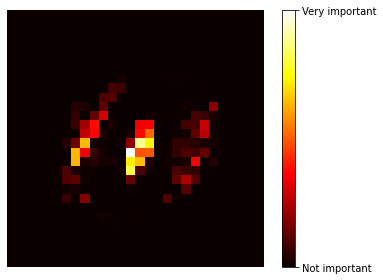

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

#displayingfeature importance using code from lecture 7

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

save_fig("mnist_feature_importance_plot")
plt.show()

## Gradient Boosting Below

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

#creating lists for saving estimator/depth corresponding to minimum error
minerror = []
estimator = []
depth = []

#function to run each estimator and depth using gradient boosting
def run_forest(n,d):
  gbrt = GradientBoostingRegressor(max_depth=d, n_estimators=n, learning_rate=1.0, random_state=0)
  gbrt.fit(X_train1, y_train1)
  y_pred = gbrt.predict(X_vali)
  error = mean_squared_error(y_vali, y_pred)
  print("NS_Estimators = ", n, "Max Depths = ", d, "\n", "Error = ", error, "\n")
  minerror.append(error)
  estimator.append(n)
  depth.append(d)

ns_estimators, max_depths = [10,20,50,100,200], [1,2,5,10,20]

for i in ns_estimators:
  for j in max_depths:
    run_forest(i,j)

#printing minimum error with corresponding hyperparameters

minerror_index = minerror.index(min(minerror))
print("Minimum Error:", min(minerror), "\nUsing best hyperparamaters - n_estimators: ", estimator[minerror_index], " and tree depth: ", depth[minerror_index])

NS_Estimators =  10 Max Depths =  1 
 Error =  0.010830395941179018 

NS_Estimators =  10 Max Depths =  2 
 Error =  0.0074026636675939075 

NS_Estimators =  10 Max Depths =  5 
 Error =  0.004990476578271879 

NS_Estimators =  10 Max Depths =  10 
 Error =  0.003479834415610475 

NS_Estimators =  10 Max Depths =  20 
 Error =  0.0032476319350474127 

NS_Estimators =  20 Max Depths =  1 
 Error =  0.009317458196380113 

NS_Estimators =  20 Max Depths =  2 
 Error =  0.008792665232084638 

NS_Estimators =  20 Max Depths =  5 
 Error =  0.004986978756986899 

NS_Estimators =  20 Max Depths =  10 
 Error =  0.003479834415610475 

NS_Estimators =  20 Max Depths =  20 
 Error =  0.0032476319350474127 

NS_Estimators =  50 Max Depths =  1 
 Error =  0.008009091720105705 

NS_Estimators =  50 Max Depths =  2 
 Error =  0.009688865786524992 

NS_Estimators =  50 Max Depths =  5 
 Error =  0.004987319214287664 

NS_Estimators =  50 Max Depths =  10 
 Error =  0.003479834415610475 

NS_Estimator

In [ ]:
#Training gradient boosting model with all training data using our best estimator of 10 and depth of 20

gbrt = GradientBoostingRegressor(max_depth=20, n_estimators=10, learning_rate=1.0, random_state=0)
gbrt.fit(X_train, y_train)
y_pred = gbrt.predict(X_test)
error = mean_squared_error(y_test, y_pred)
print("NS_Estimators = 100", "Max Depths = 10\n", "Mean Squared Error = ", error)

NS_Estimators = 100 Max Depths = 10
 Error =  0.002706359945872878


Saving figure mnist_feature_importance_plot


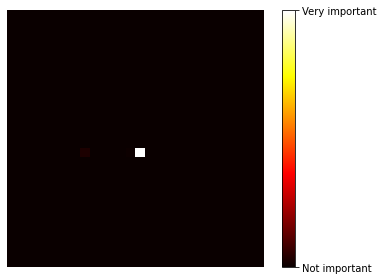

In [ ]:

#displaying feature importance using code from lecture 7

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

plot_digit(gbrt.feature_importances_)

cbar = plt.colorbar(ticks=[gbrt.feature_importances_.min(), gbrt.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

save_fig("mnist_feature_importance_plot")
plt.show()